In [73]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

# Dataset

In [29]:
df = pd.read_csv("dataset/kmeans_dataset.csv", sep=";")
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Unnamed: 6
0,12669,9656,7561,214,2674,1338,NaN
1,7057,9810,9568,1762,3293,1776,NaN
2,6353,8808,7684,2405,3516,7844,NaN
3,13265,1196,4221,6404,507,1788,NaN
4,22615,5410,7198,3915,1777,5185,NaN


In [3]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Unnamed: 6
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,0.0
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,NaN
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,NaN
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,NaN
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,NaN
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,NaN
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,NaN
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,NaN


## Demo K-means với hai cột "Fresh" và "Milk"

In [ ]:
x = df[["Fresh", "Milk"]].values
x

array([[ 12669,   9656],
       [  7057,   9810],
       [  6353,   8808],
       [ 13265,   1196],
       [ 22615,   5410],
       [  9413,   8259],
       [ 12126,   3199],
       [  7579,   4956],
       [  5963,   3648],
       [  6006,  11093],
       [  3366,   5403],
       [ 13146,   1124],
       [ 31714,  12319],
       [ 21217,   6208],
       [ 24653,   9465],
       [ 10253,   1114],
       [  1020,   8816],
       [  5876,   6157],
       [ 18601,   6327],
       [  7780,   2495],
       [ 17546,   4519],
       [  5567,    871],
       [ 31276,   1917],
       [ 26373,  36423],
       [ 22647,   9776],
       [ 16165,   4230],
       [  9898,    961],
       [ 14276,    803],
       [  4113,  20484],
       [ 43088,   2100],
       [ 18815,   3610],
       [  2612,   4339],
       [ 21632,   1318],
       [ 29729,   4786],
       [  1502,   1979],
       [   688,   5491],
       [ 29955,   4362],
       [ 15168,  10556],
       [  4591,  15729],
       [ 56159,    555],


In [6]:
x.shape

(440, 2)

In [87]:
def kmeans(x, mu_init):
    m = len(x)
    K = len(mu_init)
    c = []
    mu = []
    
    for i in range(m):
        distances = [np.linalg.norm(x[i] - mu_init[k]) for k in range(K)]
        c.append(np.argmin(distances))
    c = np.array(c)

    for k in range(K):
        mu.append(np.mean(x[c == k], axis=0))
    mu = np.array(mu)

    return (c, mu)

def loss_function(x, c, mu):
    m = len(x)
    loss = np.mean(np.array([x[i] - mu[c[i]] for i in range(m)])**2)
    return loss

In [88]:
K = 3

history = {"c": [], "mu": [], "loss": []}
for i in range(100):
    mu_init = x[np.random.choice(len(x), size=K, replace=False)]
    (c, mu) = kmeans(x, mu_init)
    loss = loss_function(x, c, mu)

    history["c"].append(c)
    history["mu"].append(mu)
    history["loss"].append(loss)

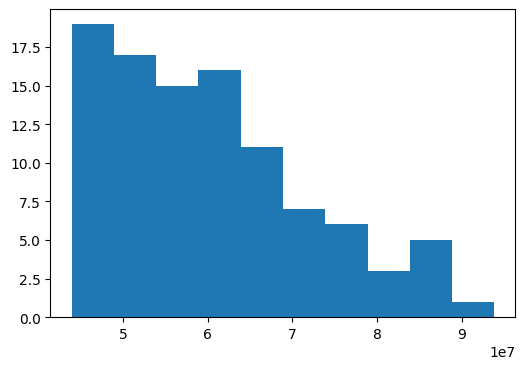

Lowest loss of 100 random initialized centroid:  43909220.7584538


In [103]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(history["loss"])
plt.show()

i = np.argmin(history["loss"])
mu = history["mu"][i]
c = history["c"][i]
loss = history["loss"][i]
print("Lowest loss of 100 random initialized centroid: ", loss)

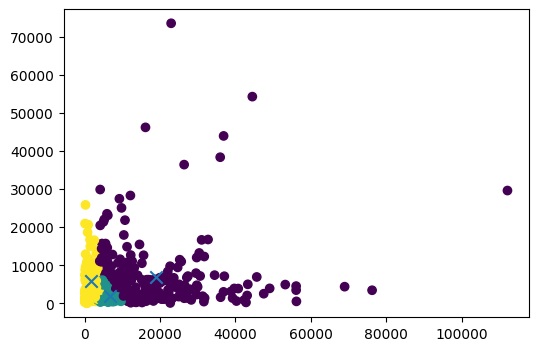

In [ ]:
c = history["c"][-1]
mu = history["mu"][-1]

fig, ax = plt.subplots(figsize=(6,4))

def update():

    ax.scatter(x[:,0], x[:,1], c=c)
    ax.scatter(mu[:,0], mu[:,1], marker="x", s=80)
    plt.show()

FuncAnimation(fig, update, frames=30)

In [90]:
mu.shape

(3, 2)

In [28]:
x = np.array([1, 2, 3, 4])
c = np.array([1, 0, 1, 0])
np.sum(x)

np.int64(10)